# Training and tuning

## Types of Errors

- Underfitting/ high bias problem
- Overfitting / high variance problem


## Model complexity graph & cross validation

Draw graph of cross validation error and training error.

At the beginning the model is **underfitting** and when the curves diverge the model starts **overfitting**, but somewhere in the middle just before the curves start diverging the model is performing pretty well.





## K-fold cross validation

Always randomize data to remove any hence of a bias.

In [1]:
from sklearn.model_selection import KFold
X = range(12)
kf = KFold(3, shuffle=True)

for train, test in kf.split(X):
    print(train, test)

[ 0  1  3  6  7  9 10 11] [2 4 5 8]
[0 1 2 3 4 5 8 9] [ 6  7 10 11]
[ 2  4  5  6  7  8 10 11] [0 1 3 9]


## Learning Curves

- Underitting converging to a large error
- Just right converging to  a small error
- Overfitting never converge.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve

In [32]:
df = pd.read_csv('datasets/learning_curves.csv');
X = np.array(df.drop('y', axis=1))
y = np.array(df['y'])

In [16]:
# fix random seed
np.random.seed(55)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import seaborn as sns; sns.set()

In [48]:
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    y[y == -1] = 0 
    return X2, Y2

X, y = randomize(X, y)

In [19]:
def draw_learning_curves(X, y, estimator, title="Learning Curves",
                         ylim=None, cv=None, n_jobs=None, 
                         train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [20]:
estimators = [LogisticRegression(solver='lbfgs'), GradientBoostingClassifier(), SVC(kernel='rbf', gamma=1000)]

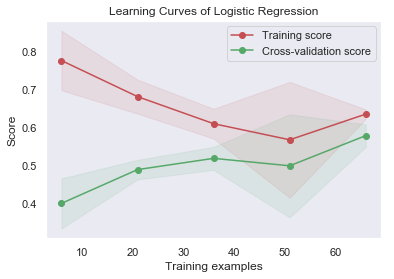

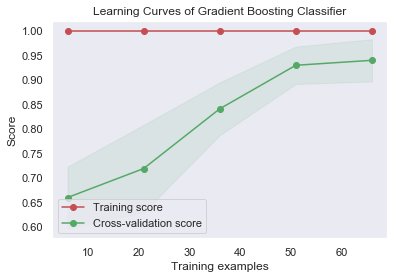

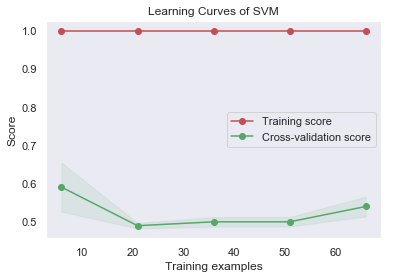

In [49]:
for estimator, title in zip(estimators, ['Logistic Regression', 'Gradient Boosting Classifier', 'SVM']): 
    draw_learning_curves(X, y, estimator, cv=3, title='Learning Curves of ' + title) 

We can observe from the curves that:

The Logistic Regression model has a low training and testing score.
The Decision Tree model has a high training and testing score.
The Support Vector Machine model has a high training score, and a low testing score.

From here, we can determine that the Logistic Regression model underfits, the SVM model overfits, and the Decision Tree model is just right.

In [23]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [75]:
def plot_descision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(X0, X1, hue=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    plt.xlim(-1, 2)
    plt.ylim(-2, 2)
    plt.show()

Logistic Regression Undertifs


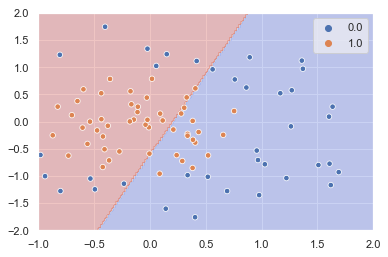

Gradient Boosting Classifier is Good


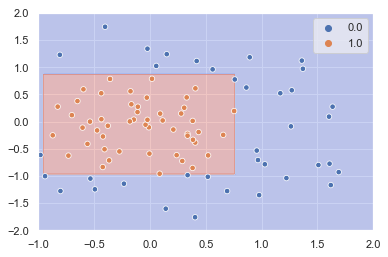

SVM Overfits


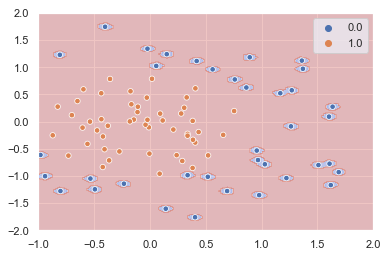

In [79]:
for estimator, title in zip(estimators, ['Logistic Regression Undertifs', 'Gradient Boosting Classifier is Good', 
                                         'SVM Overfits']): 
    print(title)
    plot_descision_boundary(estimator, X, y)

## Grid Search

In [118]:
from sklearn.model_selection import GridSearchCV

# select the parameters
parameters = {
    'kernel': ['poly', 'rbf'],
    'C': [0.1, 1, 10], 
    'gamma': ['auto', 'scale']
}

In [84]:
# create a scorer
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
scorer = make_scorer(f1_score)

In [119]:
clf = SVC()

In [126]:
# Create the grid search obj
# Computations can be run in parallel if your OS supports it, by using the keyword n_jobs=-1
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, n_jobs=-1, cv=3, iid=False)

In [123]:
# fit the data
grid_fit = grid_obj.fit(X, y)

In [130]:
best_clf = grid_fit.best_estimator_

best_params = grid_fit.best_params_

print(best_clf)
print(best_params)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
